## Importing necessary libraries and reading 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_sas('/home/arun/HPCC-covid19/LLCP/LLCP2020.XPT')
df.shape

(401958, 279)

In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000001',2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,b'02072020',b'02',b'07',b'2020',1200.0,b'2020000002',2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1.0,1.0,b'01232020',b'01',b'23',b'2020',1100.0,b'2020000003',2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1.0,1.0,b'01092020',b'01',b'09',b'2020',1100.0,b'2020000004',2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,b'01042020',b'01',b'04',b'2020',1100.0,b'2020000005',2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


# Choosing variables

In [3]:
# check for null values of each column and print the count
dfna1 = df.dropna(axis=1)
dfna2 = dfna1.dropna(axis=0)
dfna3 = df.dropna(axis=0)

print("original size", df.shape)
print("after removing columns with null values", dfna1.shape)
print("after removing rows and columns with null values", dfna2.shape)
print("after removing only rows with null values", dfna3.shape)

# Out of 279, 229 columns have null values.
# it can be seen that each row has one or more null values.

original size (401958, 279)
after removing columns with null values (401958, 50)
after removing rows and columns with null values (401958, 50)
after removing only rows with null values (0, 279)


In [5]:
# columns without any null values
dfna1.columns

# I will not be using dfna1, dfna2, dfna3 for future analysis, as it has removed some important columns.

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'SEXVAR', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT',
       '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT',
       '_RFHLTH', '_PHYS14D', '_MENT14D', '_HCVU651', '_TOTINDA', '_LTASTH1',
       '_CASTHM1', '_ASTHMS1', '_EXTETH3', '_DENVST3', '_HISPANC', '_SEX',
       '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', '_RFBMI5', '_CHLDCNT',
       '_EDUCAG', '_INCOMG', '_SMOKER3', '_RFSMOK3', 'DRNKANY5', 'DROCDY3_',
       '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_RFSEAT2', '_RFSEAT3', '_DRNKDRV'],
      dtype='object')

In [6]:
# print all the unique values of 'sexvar' column
for i in df['SEXVAR'].unique():
    print(i, type(i))

2.0 <class 'numpy.float64'>
1.0 <class 'numpy.float64'>


In [7]:
# list of all columns
cols = list(df.columns)
cols

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENM1',
 'PVTRESD1',
 'COLGHOUS',
 'STATERE1',
 'CELPHONE',
 'LADULT1',
 'COLGSEX',
 'NUMADULT',
 'LANDSEX',
 'NUMMEN',
 'NUMWOMEN',
 'RESPSLCT',
 'SAFETIME',
 'CTELNUM1',
 'CELLFON5',
 'CADULT1',
 'CELLSEX',
 'PVTRESD3',
 'CCLGHOUS',
 'CSTATE1',
 'LANDLINE',
 'HHADULT',
 'SEXVAR',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'EXERANY2',
 'SLEPTIM1',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD2',
 'HAVARTH4',
 'ADDEPEV3',
 'CHCKDNY2',
 'DIABETE4',
 'DIABAGE3',
 'LASTDEN4',
 'RMVTETH4',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL3',
 'NUMPHON3',
 'CPDEMO1B',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'PREGNANT',
 'WEIGHT2',
 'HEIGHT3',
 'DEAF',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'A

In [8]:
# To check for the presence of AGE, HEIGHT, and WEIGHT columns in the dataframe
for col in cols:
    if 'AGE' in col or 'WEIGHT' in col or 'HEIGHT' in col:
        print(col)

DIABAGE3
WEIGHT2
HEIGHT3
CNCRAGE
_AGEG5YR
_AGE65YR
_AGE80
_AGE_G


In [4]:
# filtering based on the gender (1,2 ) and weight to be less than 776 lbs. 36<= height(inch) <=95

df2 = df[np.logical_and(df.SEXVAR.isin([1,2]), df.WEIGHT2 < 776)]
df2 = df2[np.logical_and(df2.HTIN4 >= 36, df2.HTIN4 <= 95)]

print(df.shape, df2.shape)

(401958, 279) (360186, 279)


In [5]:
# Quuery filters
# 1. sevar in [1,2]
# 2. weight2 < 776
# 3. htin4 >= 36 and htin4 <= 95
# 4. ageGroup >=1 and ageGroup <= 5
# 5. genheatlth >= 1 and genheatlth <= 5
# 6. income >= 1     

df2 = df2.query('SEXVAR.isin([1,2]) & WEIGHT2 <= 776 & HTIN4 >= 36 & HTIN4 <= 95 & _AGE_G >= 1 & _AGE_G <= 6 & GENHLTH >=1 & GENHLTH <= 5 & INCOME2 <= 8 & INCOME2 >= 1')

In [6]:
print(df.shape, df2.shape)

(401958, 279) (302114, 279)


In [98]:
# Some more filters
# 1<= SLEPTIM1 <= 24
# CHECKUP1 <= 8
# MARITAL <= 6
# EDUCA <= 6
# _CHLDCNT <= 6
# EMPLOY1 <= 8
# _SMOKER3 <= 4

df2 = df2.query('SLEPTIM1 <= 24 & CHECKUP1 <= 8 & MARITAL <= 6 & EDUCA <= 6 & _CHLDCNT <= 6 & EMPLOY1 <= 8 & _SMOKER3 <= 4')
print(df2.shape)

# DIABETE4 <= 4
# EXERANY2 in yn
# HLTHPLN1 in yn
# MEDCOST in [1, 2]
# ASTHMA3 in [1, 2]
# ASTHNOW in [1, 2]
# CHCSCNCR in [1, 2]
# CHCOCNCR in [1, 2]
# CHCCOPD2 in [1, 2]
# HAVARTH4 in [1, 2]
# CHCKDNY2 in [1, 2]
# ADDEPEV3 in [1, 2]
# VETERAN3 in([1,2])

df2 = df2.query('DIABETE4 <= 4 & EXERANY2 in [1,2] & HLTHPLN1 in [1,2] & MEDCOST in [1,2] & ASTHMA3 in [1, 2] & CHCSCNCR in [1, 2] & CHCOCNCR in [1, 2] & CHCCOPD2 in [1, 2] & HAVARTH4 in [1, 2] & CHCKDNY2 in [1, 2] & ADDEPEV3 in [1, 2] & VETERAN3 in [1, 2]')
print(df2.shape)


# 101 <= ALCDAY5  <= 230, and ALCDAY = 888 (never); 777-not sure, 999-refused,

df2 = df2.query('ALCDAY5 >= 101 & ALCDAY5 <= 888 & ALCDAY5 != 777')
print(df2.shape)

(280340, 279)
(280340, 279)
(280340, 279)


# Playground

In [99]:
var = 'ALCDAY5'

print(df2[var].describe())
print("\nunique values:",np.sort(list(df2[var].unique())))
print("\nnull values:",df2[var].isna().sum(), df2[var].isnull().sum())
print(df2[var].value_counts().sort_index())


count    280340.000000
mean        503.523957
std         355.286640
min         101.000000
25%         202.000000
50%         230.000000
75%         888.000000
max         888.000000
Name: ALCDAY5, dtype: float64

unique values: [101. 102. 103. 104. 105. 106. 107. 201. 202. 203. 204. 205. 206. 207.
 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221.
 222. 223. 224. 225. 226. 227. 228. 229. 230. 888.]

null values: 0 0
101.0     12313
102.0     10360
103.0      7375
104.0      3633
105.0      3523
106.0      1226
107.0      5392
201.0     20961
202.0     16471
203.0      9395
204.0      8061
205.0      8135
206.0      3010
207.0      2131
208.0      2423
209.0       197
210.0      6585
211.0        45
212.0      1462
213.0        80
214.0       479
215.0      5518
216.0       203
217.0        80
218.0       193
219.0         9
220.0      5797
221.0       165
222.0       142
223.0        71
224.0       152
225.0      2516
226.0       143
227.0       211
228.0       78

In [155]:
var = 'ASTHNOW'

print(df2[var].describe())
print("\nunique values:",np.sort(list(df2[var].unique())))
print("\nnull values:",df2[var].isna().sum(), df2[var].isnull().sum())
print(df2[var].value_counts().sort_index())


count    37933.000000
mean         1.421665
std          0.991694
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: ASTHNOW, dtype: float64

unique values: [ 1.  2.  7.  9. nan]

null values: 242407 242407
1.0    26581
2.0    10429
7.0      909
9.0       14
Name: ASTHNOW, dtype: int64


In [55]:
# analyzing column: On average, how many cigarettes do you smoke each day?

var = 'LCSNUMCG'

print(df2[var].describe())
print("\nunique values:",np.sort(list(df2[var].unique())))
print("\nnull values:",df2[var].isna().sum(), df2[var].isnull().sum())
print("\nvalue counts\n",df2[var].value_counts().sort_index())

# it has too many null values to be removed, but then we'll be ending with very few data rows in the dataframe to work with.
# so ignore this column.

count    9725.000000
mean       37.773985
std       131.225424
min         1.000000
25%         8.000000
50%        15.000000
75%        20.000000
max       999.000000
Name: LCSNUMCG, dtype: float64

unique values: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  23.  24.  25.  26.  28.  29.  30.
  33.  35.  36.  38.  40.  41.  45.  50.  56.  60.  67.  70.  75.  77.
  80.  88.  90.  99. 100. 110. 120. 125. 777. 999.  nan]

null values: 274776 274776

value counts
 1.0       247
2.0       286
3.0       338
4.0       320
5.0       729
6.0       272
7.0       149
8.0       220
9.0        25
10.0     1968
11.0       12
12.0      154
13.0       24
14.0       14
15.0      635
16.0        7
17.0       13
18.0       34
19.0        7
20.0     2724
21.0        5
23.0        2
24.0        7
25.0      116
26.0        2
28.0        2
29.0        1
30.0      398
33.0        1
35.0       41
36.0        1
38.0        1
40.0      469
41.0      

In [56]:
# I've found a bug in read_sas, where on certain fields, 0.0 (floats) are read in as 5.397605e-79 (lowest IBM float value).

df2.replace(5.397605346934028e-79, 0, inplace = True) 

In [78]:
var = 'CHECKUP1'

print(df2[var].describe())
print("\nunique values:",np.sort(list(df2[var].unique())))
print("\nnull values:",df2[var].isna().sum(), df2[var].isnull().sum())
print(df2[var].value_counts().sort_index())



count    284341.000000
mean          1.428000
std           1.004595
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: CHECKUP1, dtype: float64

unique values: [1. 2. 3. 4. 7. 8.]

null values: 0 0
1.0    220638
2.0     32605
3.0     14915
4.0     13004
7.0      2002
8.0      1177
Name: CHECKUP1, dtype: int64


# Preparing Dataset

In [100]:
df3 = pd.DataFrame()


healthMap ={1:'1-excellent',2:'2-verygood',3:'3-good',4:'4-fair',5:'5-poor'}
ailmentMap = {1:'yes', 2:'no'}
diabetesMap = {1:'yes', 2:'yes', 3:'no', 4:'no'}
maritalMap = {1:'1-married',2:'2-divorced',3:'3-widowed',4:'4-separated',5:'5-nevermarried', 
              6:'6-unmarriedcouple'}
maritalSummary = {1:'yes',2:'no',3:'no', 4:'yes', 5:'no', 6:'no'}
educationMap = {1:'6-none', 2:'5-elementary', 3:'4-somehs', 4:'3-hs',5:'2-somecollege',6:'1-college'}
veteranMap = {1:'yes',2:'no'}
stateMap = {1:'AZ', 2:'AK', 4:'AZ',5:'AR',6:'CA', 8:'CO', 9:'CT',10:'DE',11:'DC',12:'FL',13:'GA',
           15:'HI',16:'ID',17:'IL',18:'IN',19:'IA',20:'KS', 21:'KY',22:'LA',23:'ME', 24:'MD', 25:'MA',26:'MI',
           27:'MN',28:'MS', 29:'MO', 30:'MT', 31:'NE',32:'NV', 33:'NH', 34:'NJ', 35:'NM',36:'NY', 37:'NC',
           38:'ND', 39:'OH',40:'OK',41:'OR', 42:'PA',44:'RI',45:'SC', 46:'SD', 47:'TN', 48:'TX', 49:'UT',
           50:'VT', 51:'VA', 53:'WA', 54:'WV',55:'WI', 56:'WY', 66:'Guam', 72:'PR'}
PhysicalActivityMap = {1:'yes', 2:'no'}
ChildCntMap = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 9:6}
employmentMap = {1:'1-employed', 2:'2-self-employed', 3:'3-outofwork', 4:'3-outofwork', 5:'4-homemaker', 
                6:'5-student', 7:'6-retired', 8:'7-unableToWork'}
smokerMap = {1:'1-everyday', 2: '2-occassional', 3: '3-former', 4: '4-never'}
insuranceMap = {1:'yes', 2:'no', 7:'no', 9:'no'}
checkupMap = {1:'1-in1-Year', 2:'2-in2-Years', 3:'3-in5-Years', 4:'4-5orMore-Years', 7:'4-5orMore-Years', 8:'4-5orMore-Years'}
nohospitalcostMap = {1:'yes', 2:'no'}

df3['age'] = df2['_AGE80']
df3['gender'] = df2['SEXVAR'].map({1:'male',2:'female'})
df3['weight'] = df2['WEIGHT2'].round(-1)  # rounding to nearest 10th value.
df3['height'] = df2['HTIN4']
df3['ageGroup'] = df2['_AGE_G']
df3['genhealth'] = df2['GENHLTH'].map(healthMap)
df3['asthma'] = df2['ASTHMA3'].map(ailmentMap)  # renamed asthma_ever to asthma
# df3['asthma'] = df2['ASTHNOW'].map(ailmentMap) # it has 250000 null values,(it was a subquestion)
df3['skincancer'] = df2['CHCSCNCR'].map(ailmentMap)
df3['othercancer'] = df2['CHCOCNCR'].map(ailmentMap)
df3['copd'] = df2['CHCCOPD2'].map(ailmentMap)
df3['arthritis'] = df2['HAVARTH4'].map(ailmentMap)
df3['depression'] = df2['ADDEPEV3'].map(ailmentMap)
df3['kidneydis'] = df2['CHCKDNY2'].map(ailmentMap)
df3['diabetes'] = df2['DIABETE4'].map(diabetesMap)
df3['maritaldetail'] = df2['MARITAL'].map(maritalMap)
df3['married'] = df2['MARITAL'].map(maritalSummary)
df3['education'] = df2['EDUCA'].map(educationMap)
df3['veteran'] = df2['VETERAN3'].map(veteranMap)
df3['income'] = df2['INCOME2']
df3['state'] = df2['_STATE'].map(stateMap)
df3['childcnt'] = df2['_CHLDCNT'].map(ChildCntMap)
df3['sleephours'] = df2['SLEPTIM1']
df3['employment'] = df2['EMPLOY1'].map(employmentMap)
df3['smokertype'] = df2['_SMOKER3'].map(smokerMap)

df3['physicalactivity'] = df2['EXERANY2'].map(PhysicalActivityMap)
df3['insurance'] = df2['HLTHPLN1'].map(insuranceMap)
df3['checkup'] = df2['CHECKUP1'].map(checkupMap)
df3['nohospitalcost'] = df2['MEDCOST'].map(nohospitalcostMap)



In [101]:
# new columns : BMI and BMI category
# BMI = (weight in pounds x 703) / (height in inches x height in inches).

df3['bmi'] = (df2['WEIGHT2'] * 703) / np.square(df2['HTIN4'])

def bmicatmap(bmi):
    if bmi < 18.5:
        return '1-underweight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return '2-normal'
    elif bmi >= 25 and bmi <= 29.9:
        return '3-overweight'
    elif bmi >= 30 and bmi < 40:
        return '4-obese'
    else:
        return '5-extremely obese'

df3['bmi'] = df3['bmi'].round() # rounding to nearest integer

df3['bmicat'] = df3['bmi'].apply(bmicatmap)

var = 'bmicat'

print(df3[var].describe())
print("\nunique values:",np.sort(list(df3[var].unique())))
print("\nnull values:",df3[var].isna().sum(), df3[var].isnull().sum(), "\n")
print(df3[var].value_counts().sort_index())

count           280340
unique               5
top       3-overweight
freq             99885
Name: bmicat, dtype: object

unique values: ['1-underweight' '2-normal' '3-overweight' '4-obese' '5-extremely obese']

null values: 0 0 

1-underweight         4094
2-normal             75242
3-overweight         99885
4-obese              84889
5-extremely obese    16230
Name: bmicat, dtype: int64


In [102]:
var = 'bmi'

print(df3[var].describe())
print("\nunique values:",np.sort(list(df3[var].unique())))
print("\nnull values:",df3[var].isna().sum(), df3[var].isnull().sum(), "\n")
# print(df3[var].value_counts().sort_index())

print("Applying the filter of bmi<60")
df3 = df3.query('bmi < 60')

print("original shape",df3.shape, "\nnew shape",df3.shape)
print(df3[var].describe())

count    280340.000000
mean         28.460523
std           6.405062
min           8.000000
25%          24.000000
50%          27.000000
75%          32.000000
max         194.000000
Name: bmi, dtype: float64

unique values: [  8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.
  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.
  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  82.  83.  84.  85.  87.  88.  89.  90.  92.  93.  94.
  95. 102. 103. 106. 108. 110. 111. 117. 122. 124. 125. 132. 141. 155.
 191. 194.]

null values: 0 0 

Applying the filter of bmi<60
original shape (279922, 30) 
new shape (279922, 30)
count    279922.000000
mean         28.400269
std           6.190676
min           8.000000
25%          24.000000
50%          27.000000
75%          32.000000
ma

In [103]:
var = 'bmicat'

print(df3[var].describe())
print("\nunique values:",np.sort(list(df3[var].unique())))
print("\nnull values:",df3[var].isna().sum(), df3[var].isnull().sum(), "\n")
print(df3[var].value_counts().sort_index())

count           279922
unique               5
top       3-overweight
freq             99885
Name: bmicat, dtype: object

unique values: ['1-underweight' '2-normal' '3-overweight' '4-obese' '5-extremely obese']

null values: 0 0 

1-underweight         4094
2-normal             75242
3-overweight         99885
4-obese              84889
5-extremely obese    15812
Name: bmicat, dtype: int64


In [104]:
# looking at the values of a column - number of drnks per day in the past 30 days
# in the form of 1xx days per week (01 <= xx <= 07), 2yy days per month (01 <= yy <= 30)

var = 'ALCDAY5'

print(df2[var].describe())
print("\nunique values:",np.sort(list(df2[var].unique())))
print("\nnull values:",df2[var].isna().sum(), df2[var].isnull().sum())
df2[var].value_counts().sort_index()


count    280340.000000
mean        503.523957
std         355.286640
min         101.000000
25%         202.000000
50%         230.000000
75%         888.000000
max         888.000000
Name: ALCDAY5, dtype: float64

unique values: [101. 102. 103. 104. 105. 106. 107. 201. 202. 203. 204. 205. 206. 207.
 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221.
 222. 223. 224. 225. 226. 227. 228. 229. 230. 888.]

null values: 0 0


101.0     12313
102.0     10360
103.0      7375
104.0      3633
105.0      3523
106.0      1226
107.0      5392
201.0     20961
202.0     16471
203.0      9395
204.0      8061
205.0      8135
206.0      3010
207.0      2131
208.0      2423
209.0       197
210.0      6585
211.0        45
212.0      1462
213.0        80
214.0       479
215.0      5518
216.0       203
217.0        80
218.0       193
219.0         9
220.0      5797
221.0       165
222.0       142
223.0        71
224.0       152
225.0      2516
226.0       143
227.0       211
228.0       780
229.0       275
230.0     12419
888.0    128409
Name: ALCDAY5, dtype: int64

In [113]:
# new columns : days of drinks in a month

def drinksmap(x):

    if x>=101 and x<=107:  # number of days of drinks per week, multiplied by 4 to average it to month.
        return (x-100)*(4)
    elif x>=201 and x<=230:
        return (x-200)     # number of drinks per month
    elif x == 888:
        return 0
    
df3['drinks'] = df2['ALCDAY5'].apply(drinksmap)

var = 'drinks'

print(df3[var].describe())
print("\nunique values:",np.sort(list(df3[var].unique())))
print("\nnull values:",df3[var].isna().sum(), df3[var].isnull().sum(), "\n")
print(df3[var].value_counts().sort_index())

count    279922.000000
mean          5.440073
std           8.571907
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          30.000000
Name: drinks, dtype: float64

unique values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]

null values: 0 0 

0.0     128134
1.0      20923
2.0      16448
3.0       9384
4.0      20357
5.0       8126
6.0       3008
7.0       2131
8.0      12778
9.0        197
10.0      6580
11.0        45
12.0      8832
13.0        80
14.0       479
15.0      5515
16.0      3834
17.0        80
18.0       193
19.0         9
20.0      9318
21.0       165
22.0       142
23.0        71
24.0      1377
25.0      2516
26.0       143
27.0       211
28.0      6172
29.0       275
30.0     12399
Name: drinks, dtype: int64


In [107]:
df3.describe()

,age,weight,height,ageGroup,income,childcnt,sleephours,bmi,drinks
count,279922.000000,279922.000000,279922.000000,279922.000000,279922.000000,279922.000000,279922.000000,279922.000000,279922.000000
mean,54.121091,183.045777,67.176424,4.331221,6.142972,0.540869,7.080037,28.400269,5.440073
std,17.298541,45.528680,4.156889,1.590634,2.045407,1.026217,1.430493,6.190676,8.571907
min,18.000000,50.000000,36.000000,1.000000,1.000000,0.000000,1.000000,8.000000,0.000000
25%,40.000000,150.000000,64.000000,3.000000,5.000000,0.000000,6.000000,24.000000,0.000000
50%,56.000000,180.000000,67.000000,5.000000,7.000000,0.000000,7.000000,27.000000,1.000000
75%,68.000000,210.000000,70.000000,6.000000,8.000000,1.000000,8.000000,32.000000,8.000000
max,80.000000,550.000000,92.000000,6.000000,8.000000,5.000000,24.000000,59.000000,30.000000


In [109]:
print(df3.columns)
print("\nshape",df3.shape)
df3.asthma.describe()

Index(['age', 'gender', 'weight', 'height', 'ageGroup', 'genhealth', 'asthma',
       'skincancer', 'othercancer', 'copd', 'arthritis', 'depression',
       'kidneydis', 'diabetes', 'maritaldetail', 'married', 'education',
       'veteran', 'income', 'state', 'childcnt', 'sleephours', 'employment',
       'smokertype', 'physicalactivity', 'insurance', 'checkup',
       'nohospitalcost', 'bmi', 'bmicat', 'drinks'],
      dtype='object')

shape (279922, 31)


count     279922
unique         2
top           no
freq      242125
Name: asthma, dtype: object

In [114]:
df3.isnull().sum()

age                 0
gender              0
weight              0
height              0
ageGroup            0
genhealth           0
asthma              0
skincancer          0
othercancer         0
copd                0
arthritis           0
depression          0
kidneydis           0
diabetes            0
maritaldetail       0
married             0
education           0
veteran             0
income              0
state               0
childcnt            0
sleephours          0
employment          0
smokertype          0
physicalactivity    0
insurance           0
checkup             0
nohospitalcost      0
bmi                 0
bmicat              0
drinks              0
dtype: int64

In [112]:
print(df3.isna())
df3.isnull().sum()

          age  gender  weight  height  ageGroup  genhealth  asthma  \
0       False   False   False   False     False      False   False   
5       False   False   False   False     False      False   False   
6       False   False   False   False     False      False   False   
8       False   False   False   False     False      False   False   
10      False   False   False   False     False      False   False   
...       ...     ...     ...     ...       ...        ...     ...   
401948  False   False   False   False     False      False   False   
401950  False   False   False   False     False      False   False   
401952  False   False   False   False     False      False   False   
401954  False   False   False   False     False      False   False   
401955  False   False   False   False     False      False   False   

        skincancer  othercancer   copd  ...  sleephours  employment  \
0            False        False  False  ...       False       False   
5            Fals

age                 0
gender              0
weight              0
height              0
ageGroup            0
genhealth           0
asthma              0
skincancer          0
othercancer         0
copd                0
arthritis           0
depression          0
kidneydis           0
diabetes            0
maritaldetail       0
married             0
education           0
veteran             0
income              0
state               0
childcnt            0
sleephours          0
employment          0
smokertype          0
physicalactivity    0
insurance           0
checkup             0
nohospitalcost      0
bmi                 0
bmicat              0
drinks              0
dtype: int64

In [115]:
# I have already generated and started analyzing, so I don't want to overwrite the data.
df3.to_csv('/home/arun/HPCC-covid19/LLCP/llcpA.csv', index=False)

# Playground 2 
with final dataset

In [116]:
# read llcpA.csv file
dff = pd.read_csv('/home/arun/HPCC-covid19/LLCP/llcpA.csv')
print(dff.shape)

(279922, 31)


In [117]:
dff.columns

Index(['age', 'gender', 'weight', 'height', 'ageGroup', 'genhealth', 'asthma',
       'skincancer', 'othercancer', 'copd', 'arthritis', 'depression',
       'kidneydis', 'diabetes', 'maritaldetail', 'married', 'education',
       'veteran', 'income', 'state', 'childcnt', 'sleephours', 'employment',
       'smokertype', 'physicalactivity', 'insurance', 'checkup',
       'nohospitalcost', 'bmi', 'bmicat', 'drinks'],
      dtype='object')

In [154]:
var = 'drinks'

print(dff[var].describe())
print("\nunique values:",len(np.sort(list(dff[var].unique()))), "\n", np.sort(list(dff[var].unique())))
print("\nnull values:",dff[var].isna().sum(), dff[var].isnull().sum(), "\n")
print(dff[var].value_counts().sort_index())

count    279922.000000
mean          5.440073
std           8.571907
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          30.000000
Name: drinks, dtype: float64

unique values: 31 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]

null values: 0 0 

0.0     128134
1.0      20923
2.0      16448
3.0       9384
4.0      20357
5.0       8126
6.0       3008
7.0       2131
8.0      12778
9.0        197
10.0      6580
11.0        45
12.0      8832
13.0        80
14.0       479
15.0      5515
16.0      3834
17.0        80
18.0       193
19.0         9
20.0      9318
21.0       165
22.0       142
23.0        71
24.0      1377
25.0      2516
26.0       143
27.0       211
28.0      6172
29.0       275
30.0     12399
Name: drinks, dtype: int64


In [119]:
dff.isnull().sum()

age                 0
gender              0
weight              0
height              0
ageGroup            0
genhealth           0
asthma              0
skincancer          0
othercancer         0
copd                0
arthritis           0
depression          0
kidneydis           0
diabetes            0
maritaldetail       0
married             0
education           0
veteran             0
income              0
state               0
childcnt            0
sleephours          0
employment          0
smokertype          0
physicalactivity    0
insurance           0
checkup             0
nohospitalcost      0
bmi                 0
bmicat              0
drinks              0
dtype: int64

In [120]:
np.sort(dff['bmi'].unique())

array([ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.,
       21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.])

In [121]:
dff[dff.eq(5.397605346934028e-79).any(1)]

,age,gender,weight,height,ageGroup,genhealth,asthma,skincancer,othercancer,copd,...,sleephours,employment,smokertype,physicalactivity,insurance,checkup,nohospitalcost,bmi,bmicat,drinks


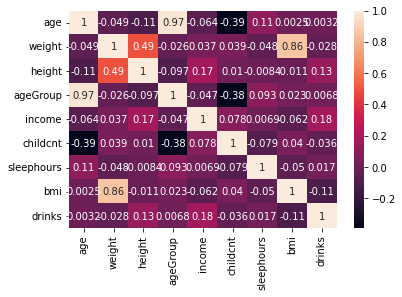

In [157]:
# draw corelation heatmap of df3
import seaborn as sns
%matplotlib inline
sns.heatmap(dff.corr(), annot=True)
plt.show()


* Interesting corelations between variables

1. Age & childcount

2. weight & Height

3. weight & bmi

4. height & income

5. Height & drinks

6. income & drinks

7. sleephours & age

8. bmi & drinks